# 1 数据读取

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

project_dir = './'

train = pd.read_csv(project_dir + 'data/train.csv')
test = pd.read_csv(project_dir + 'data/test.csv')
PassengerId = test['PassengerId']
all_data = pd.concat([train, test], ignore_index = True)

## 1.1 数据预览
字段含义

|字段|意义|备注|
|---|---|---|
|PassengerID|乘客ID|不作为特征|
|Survived|是否存活|标签|
|Pclass|客舱等级|很重要|
|Name|姓名|可提取出家族等信息|
|Sex|性别|较为重要|
|Age|年龄|较为重要|
|Parch|直系亲友|亲友见相互帮助|
|SibSp|旁系|亲友见相互帮助|
|Ticket|票编号|-|
|Fare|票价|-|
|Cabin|客舱编号|-|
|Embarked|上船的港口编号|-|

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 2 数据分析
主要时为了初步了解数据之间的相关性,为构造特征工程以及模型建立做准备

In [6]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 结论一
女性存活率远高于男性存活率

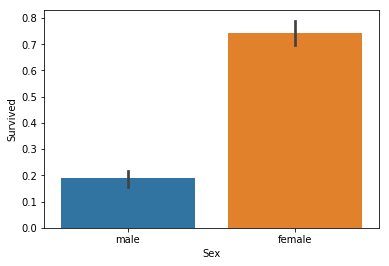

In [7]:
sns.barplot(x="Sex", y="Survived", data=train)

# 结论二
乘客客舱等级越高，存活率越大

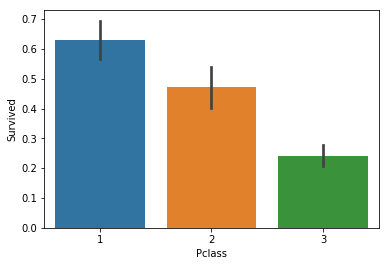

In [8]:
sns.barplot(x="Pclass", y="Survived", data=train)

# 结论三
旁系亲属适中的存活率较高

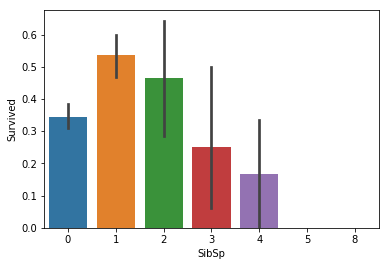

In [9]:
sns.barplot(x="SibSp", y="Survived", data=train)

# 结论三
直系亲属适中的存活率较高

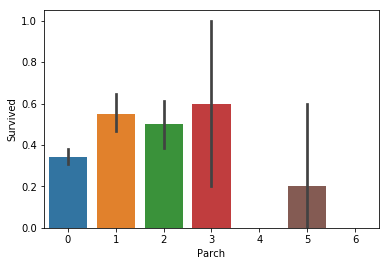

In [10]:
sns.barplot(x="Parch", y="Survived", data=train)

# 结论四
从不同生还情况的密度图可以看出，在年龄15岁的左侧，生还率有明显差别，密度图非交叉区域面积非常大，但在其他年龄段，则差别不是很明显，认为是随机所致，因此可以考虑将此年龄偏小的区域分离出来。

Text(12.3598,0.5,'density')

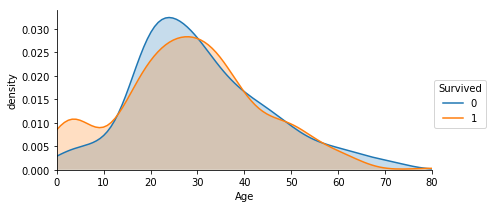

In [11]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('density') 

# 结论五
从C港口上船的乘客存活更多

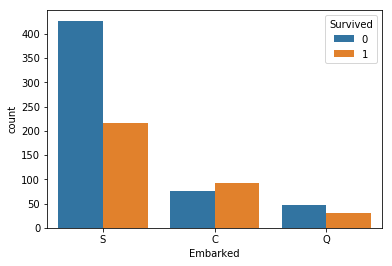

In [12]:
sns.countplot('Embarked',hue='Survived',data=train)

# 结论六
不同称呼的乘客幸存率不同<br>
新增Title特征，从姓名中提取乘客的称呼，归纳为六类

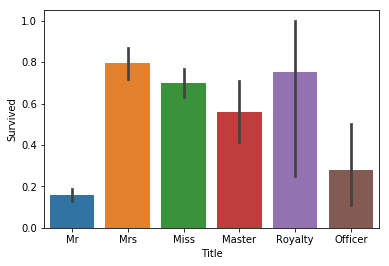

In [13]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data)

# 结论七
家庭人数为2到4的乘客幸存率较高<br>
新增FamilyLabel特征，先计算FamilySize=Parch+SibSp+1，然后把FamilySize分为三类。

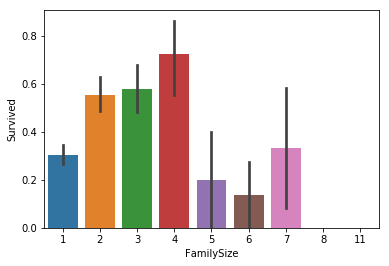

In [14]:
all_data['FamilySize']=all_data['SibSp'] + all_data['Parch'] + 1
sns.barplot(x="FamilySize", y="Survived", data=all_data)

按生存率把FamilySize分为三类，构成FamilyLabel特征

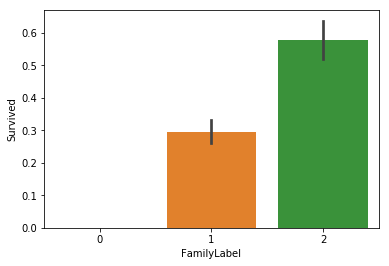

In [15]:
def Fam_label(FamilySize):
    if (FamilySize >= 2) & (FamilySize <= 4):
        return 2
    elif ((FamilySize > 4) & (FamilySize <= 7)) | (FamilySize == 1):
        return 1
    elif (FamilySize > 7):
        return 0
all_data['FamilyLabel']=all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data)

# 结论八
不同客舱的乘客幸存率不同<br>
新增Deck特征，先把Cabin空缺值填充为'Unknown'，再提取Cabin中的首字母构成乘客的甲板号。

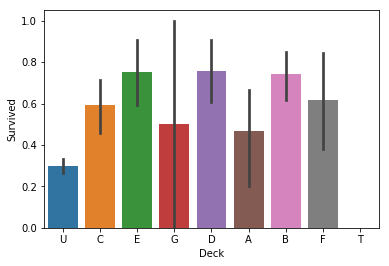

In [16]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data)

# 结论九
与2至4人共票编号的乘客幸存率较高<br>
新增TicketGroup特征，统计每个乘客的共票编号数。

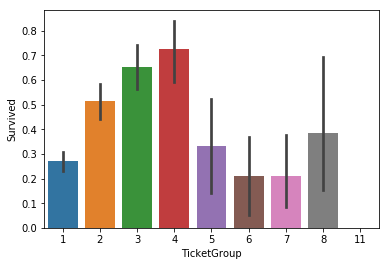

In [17]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

按生存率将TicketGroup分为三类

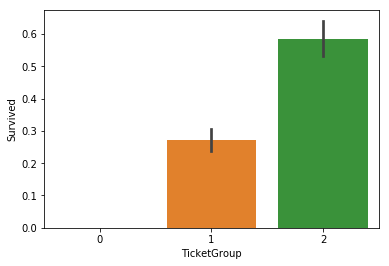

In [18]:
def Ticket_Label(count):
    if (count >= 2) & (count <= 4):
        return 2
    elif ((count > 4) & (count <= 8)) | (count == 1):
        return 1
    elif (count > 8):
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

# 3 数据清洗

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
Age            1046 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
FamilySize     1309 non-null int64
FamilyLabel    1309 non-null int64
Deck           1309 non-null object
TicketGroup    1309 non-null int64
dtypes: float64(3), int64(7), object(7)
memory usage: 173.9+ KB


## 3.1 填充缺失值
Age缺失量为263，缺失量较大，用Sex, Title, Pclass三个特征构建随机森林模型，填充年龄缺失值。

In [20]:
from sklearn.ensemble import RandomForestRegressor

age_df = all_data[['Age', 'Pclass','Sex','Title']]
age_df=pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].as_matrix()  # age不为空的
unknown_age = age_df[age_df.Age.isnull()].as_matrix() # age为空的
y = known_age[:, 0]    # 获取到年龄
X = known_age[:, 1:]   # 获取到年龄外的其他数据
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges 

Embarked缺失量为2，缺失Embarked信息的乘客的Pclass均为1，且Fare均为80，因为Embarked为C且Pclass为1的乘客的Fare中位数为80，所以缺失值填充为C。

In [21]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


In [22]:
all_data.groupby(by=["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [23]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

Fare缺失量为1，缺失Fare信息的乘客的Embarked为S，Pclass为3，所以用Embarked为S，Pclass为3的乘客的Fare中位数填充。

In [24]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1,U,1


In [25]:
fare=all_data[(all_data['Embarked'] == "S") & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)

## 3.2 家族识别
把姓氏相同的乘客划分为同一组，从人数大于一的组中分别提取出每组的妇女儿童和较大的男性。

In [26]:
all_data['Surname'] = all_data['Name'].apply(lambda x:x.split(',')[0].strip()) # 提取姓氏
Surname_Count = dict(all_data['Surname'].value_counts())
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])
# 小于12岁的为儿童,提取每个家族中妇女和儿童的数量
Female_Child_Group = all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) | (all_data['Sex']=='female'))]
# 大于十二岁的男性,提取每个家族中年龄大于12岁的男性数量
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]

发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。

In [27]:
Female_Child = pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns = ['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5,0,'Female_Child-AverageSurvived')

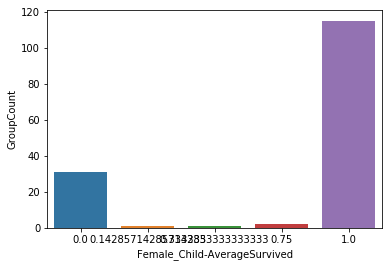

In [28]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('Female_Child-AverageSurvived')

绝大部分成年男性组的平均存活率也为1或0。

In [29]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


Text(0.5,0,'Male_Adult-AverageSurvived')

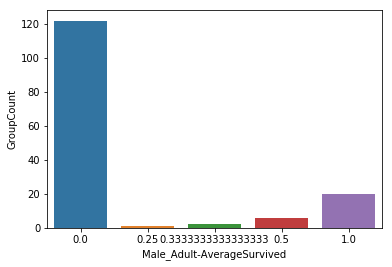

In [30]:
sns.barplot(x=Male_Adult.index, y=Male_Adult["GroupCount"]).set_xlabel('Male_Adult-AverageSurvived')

因为普遍规律是女性和儿童幸存率高，成年男性幸存较低，所以我们把不符合普遍规律的反常组选出来单独处理。把女性和儿童组中幸存率为0的组设置为遇难组，把成年男性组中存活率为1的设置为幸存组，推测处于遇难组的女性和儿童幸存的可能性较低，处于幸存组的成年男性幸存的可能性较高。

In [31]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Sage', 'Rice', 'Ilmakangas', 'Palsson', 'Lefebre', 'Caram', 'Johnston', 'Jussila', 'Boulos', 'Zabour', 'Attalah', 'Lobb', 'Cacic', 'Barbara', 'Bourke', 'Strom', 'Olsson', 'Canavan', 'Danbom', 'Oreskovic', 'Turpin', 'Goodwin', 'Lahtinen', 'Van Impe', 'Vander Planke', 'Ford', 'Robins', 'Skoog', 'Rosblom', 'Arnold-Franchi', 'Panula'}
{'Cardeza', 'Nakid', 'Bishop', 'Beckwith', 'Dick', 'Frolicher-Stehli', 'Chambers', 'Beane', 'Frauenthal', 'Jonsson', 'Jussila', 'Goldenberg', 'McCoy', 'Greenfield', 'Taylor', 'Bradley', 'Daly', 'Kimball', 'Harder', 'Duff Gordon'}


为了使处于这两种反常组中的样本能够被正确分类，对测试集中处于反常组中的样本的Age，Title，Sex进行惩罚修改。

In [32]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

## 3.3 特征转换
选取特征，转换为数值变量，划分训练集和测试集。

In [33]:
all_data=pd.concat([train, test])
all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data=pd.get_dummies(all_data)
train=all_data[all_data['Survived'].notnull()]
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X = train.as_matrix()[:,1:]
y = train.as_matrix()[:,0]

# 4 模型和优化
## 4.1 参数优化
用网格搜索自动化选取最优参数，事实上我用网格搜索得到的最优参数是n_estimators = 28，max_depth = 6。但是参考另一篇Kernel把参数改为n_estimators = 26，max_depth = 6之后交叉验证分数和kaggle评分都有略微提升。

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10, verbose=1)
gsearch.fit(X,y)
# 打印最优参数和最优评分
print(gsearch.best_params_, gsearch.best_score_)

Fitting 10 folds for each of 285 candidates, totalling 2850 fits
{'classify__max_depth': 6, 'classify__n_estimators': 42} 0.8810963508395343


[Parallel(n_jobs=1)]: Done 2850 out of 2850 | elapsed:  2.5min finished


## 4.2 模型训练

In [38]:
from sklearn.pipeline import make_pipeline
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=20, score_func=<function f_classif at 0x000001E0D15F9400>)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decreas...estimators=26, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=True))])

# 4.3 交叉验证

In [39]:
from sklearn import cross_validation, metrics
cv_score = cross_validation.cross_val_score(pipeline, X, y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

CV Score : Mean - 0.8451402 | Std - 0.03276752 


# 5 预测

In [40]:
predictions = pipeline.predict(test)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv(project_dir + "data/submission1.csv", index=False)

# 6 函数学习
## pandas.core.frame.DataFrame的一些函数
### head()和tail()
显示DF的前n行和最后n行，其中n默认为5。
### info
统计基本信息，如索引、列数、列名、数据量、数据类型、缺失值、内存等
### value_counts()
是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值。是Series拥有的方法，一般在DataFrame中使用时，需要指定对哪一列或行使用

## seaborn
Seaborn是基于matplotlib的图形可视化python包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。<br>
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。
### barplot
绘制柱状图，参数包括，$x$,$y$,$data$等，其中$x$,$y$是DF中的列名，data则为DF或者数组。条形图上的误差棒则表示各类的数值相对于条形图所显示的值的误差。
### FacetGrid
用于绘制条件关系的多图网格。参考：[seaborn.FacetGrid](https://www.cntofu.com/book/172/docs/32.md)
### kdeplot
可用于对单变量和双变量进行核密度估计并可视化，参考：[kdeplot](https://www.cnblogs.com/feffery/p/11128113.html)
## SelectKBest
用于特征选择，含有两个参数$score\_func$和$k$:<br>
$score\_func$：是一个函数，它的作用是给特征进行打分，然后从高到底选取特征；<br>
$k$：是一个数字，是限定选择前多少个特征的。
## RandomForestClassifier
参考[使用sklearn--Random Forest参数说明（待补充）](https://www.cnblogs.com/amberdata/p/7203632.html)

## GridSearchCV
GridSearchCV的名字其实可以拆分为两部分，GridSearch和CV，即网格搜索和交叉验证。
- estimator：所使用的分类器，每个分类器都需要一个scoring参数或者score方法。
- scoring：准确评价标准，默认为None（使用estimator的误差估计函数），这时需要使用score函数；或者如scoring='roc_auc'，根据所选模型不同，评价准则不同。
- cv：交叉验证参数，默认为None
- refit：默认为True，程序将会以交叉验证训练集得到的最佳参数，重新对所有可用的训练集与测试集进行，作为最终用于性能评估的最佳模型参数。即在搜索参数结束后，用最佳参数结果再次fit一遍全部数据集。
- iid:默认True,为True时，默认为各个样本fold概率分布一致，误差估计为所有样本之和，而非各个fold的平均。
- verbose：日志冗长度，0：不输出训练过程，1：偶尔输出，>1：对每个子模型都输出。
- n_jobs: 并行数，-1：跟CPU核数一致, 1:默认值。
- pre_dispatch：指定总共分发的并行任务数。当n_jobs大于1时，数据将在每个运行点进行复制，这可能导致OOM，而设置pre_dispatch参数，则可以预先划分总共的job数量，使数据最多被复制pre_dispatch次，进行预测的常用方法和属性
- grid.fit()：运行网格搜索
- grid_scores_：给出不同参数情况下的评价结果
- best_params_：描述了已取得最佳结果的参数的组合
- best_score_：成员提供优化过程期间观察到的最好的评分